In [1]:
import os
import sys

repo_root_path = os.path.abspath(os.path.join(os.path.pardir, 'hebbnets'))
if repo_root_path not in sys.path:
    sys.path.append(repo_root_path)

import numpy as np
import matplotlib.pyplot as plt

from demo_utils import get_random_data
from hebbnets.hebbnets.hah_model import MultilayerHahNetwork

%matplotlib nbagg

# Set up demo data

In [2]:
num_samples = 25
data_output_dimension = 100
data_latent_dimension = 3

demo_data = get_random_data(
    num_samples,
    data_output_dimension,
    latent_dim=data_latent_dimension
)

# Set up HAH network

In [3]:
input_layer_size = data_output_dimension
nodes_per_layer = [1]

hah_network = MultilayerHahNetwork(
    input_layer_size,
    nodes_per_layer,
    has_bias=False,
    act_type='linear',
)

# Train network

In [4]:
hah_network.train(demo_data, num_epochs=1000)

# Compare network to top PC

In [5]:
# Get top principle component for input sample
U, S, V = np.linalg.svd(np.array(demo_data))
first_principal_comp = V[np.argmax(S), :]

# Get pattern of input weights in network
hah_input_weights = np.squeeze(hah_network.layers[0].input_weights)

If everything has gone well, the scatter plot below should show that the learned input-weights for this model correspond to the first principle component for this data

<IPython.core.display.Javascript object>


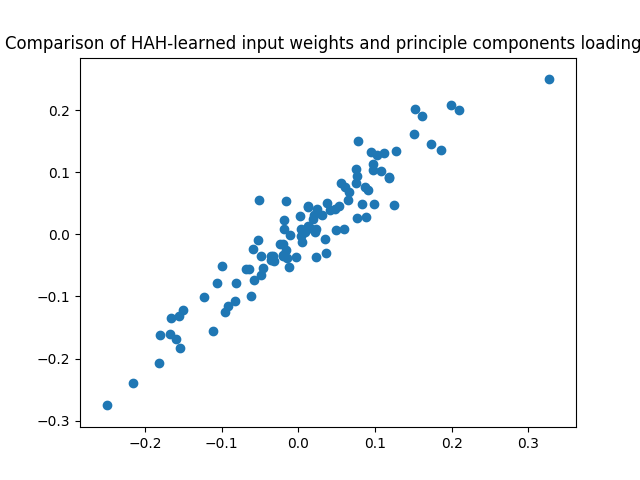

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.set_title('Comparison of HAH-learned input weights and principle components loadings')
ax.scatter(
    first_principal_comp.ravel(),
    hah_input_weights.ravel()
)